In [1]:
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import os, sys
sys.path.append("../src")
from isingFunctions import *

In [2]:
# Params

#dimensions of the lattice

dim = 10

L, C = dim, dim 


#Coupling matrix J with antiferromagetic edges with periodic boundary conditions
J = build_J(L, C)


#Build a vector of constants : biases?
b = np.zeros([L*C, 1])


#feedback strength
alpha = 0.25

#coupling strength
beta = 0.29


# zero mean gaussian noise std
std = np.sqrt(0.02)

#MZM bias 
MZM_bias = np.pi/4

# DC bias :  to have the oposite sign spins
DC_bias = 1/2

#Iteration count for simulation
Nb_It = 100

Alpha :  0.25
Beta :  0.29


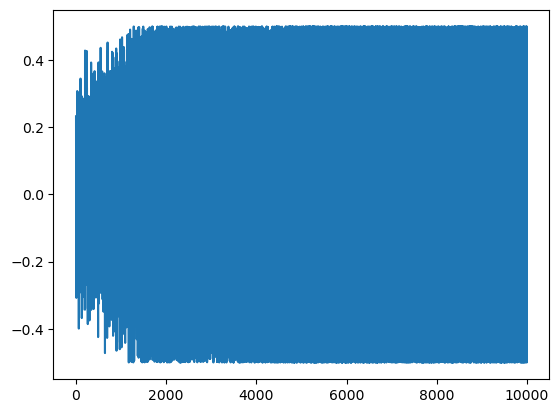

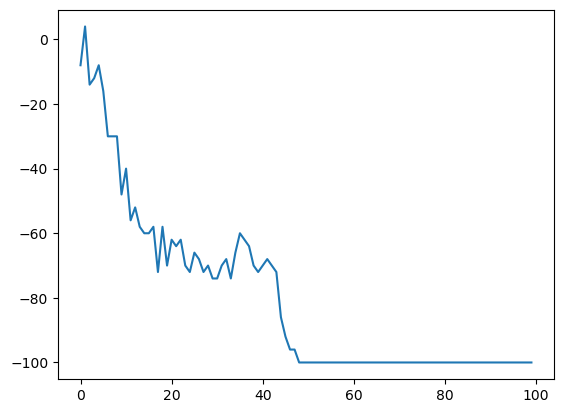

In [3]:
print("Alpha : ", alpha)
print("Beta : ", beta)

# run the Ising machine

x, sigma ,HIsing = IsingMachine(J,b,alpha,beta,std,MZM_bias,DC_bias,Nb_It)



plt.close('all')
#plot sample and hold photodiodee output signal evolution with iteration index
plt.figure(1000)
plt.plot(np.arange(L*C*Nb_It), np.transpose(x).reshape([x.size]))
plt.figure(2000)
plt.plot(HIsing)

0


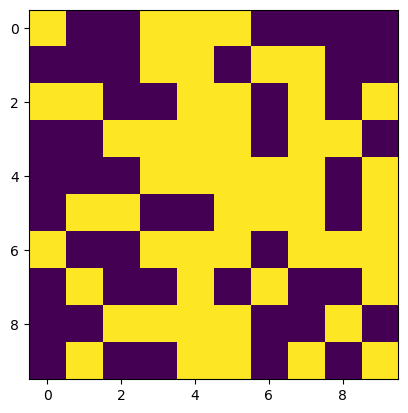

In [4]:
iteration = 0
#convert spin vector to img
plt.figure(iteration+10)
img = np.reshape(sigma[:, 0], [L, C])
print(iteration)

plt.imshow(img)  

-1


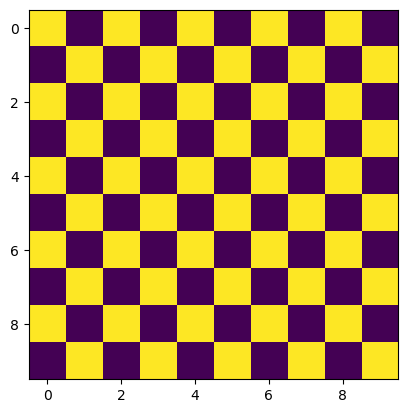

In [5]:
iteration = -1
#convert spin vector to img
plt.figure(iteration+10)
img = np.reshape(sigma[:, iteration], [L, C])
print(iteration)

plt.imshow(img)  

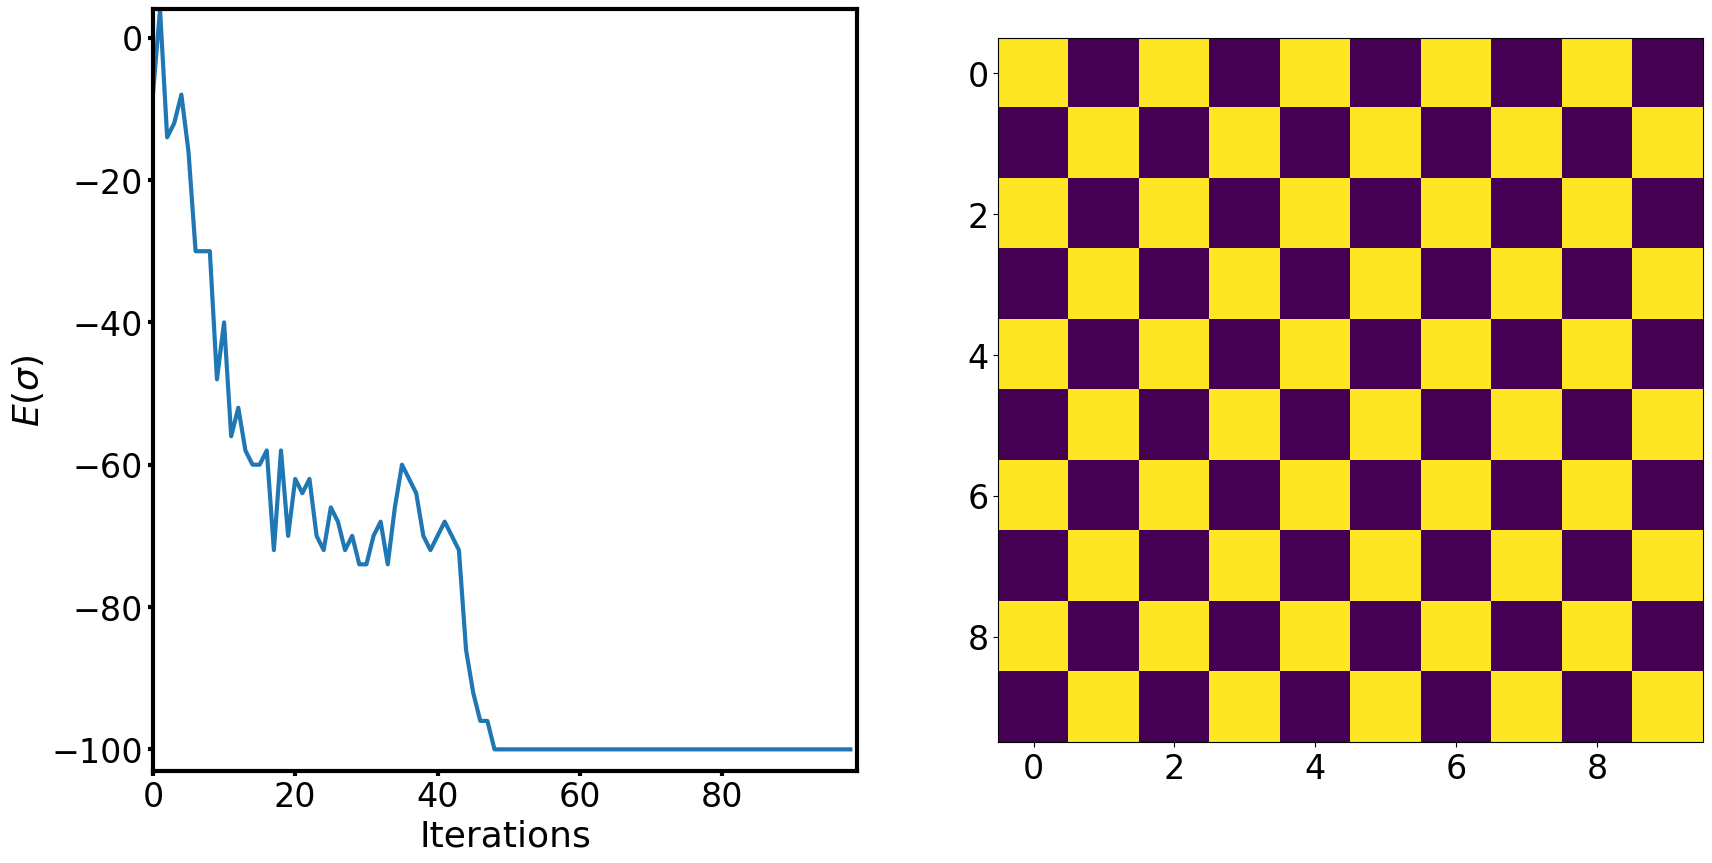

In [9]:
import matplotlib.pyplot as plt
import numpy as np

import matplotlib.animation as animation

plt.close('all')
fig_ani, ax_ani = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))


t = np.arange(HIsing.size)
z = HIsing 

#scat = ax.scatter(t[0], z2[0], c="b", s=5) # , label=f'v0 = {v0} m/s')
line  = ax_ani[0].plot(t[0], z[0], lw=3) # , label=f'v0 = {v02} m/s')[0]
ax_ani[0].set(xlim=[0, np.max(t)], ylim=[np.min(z)-3, np.max(z)])
img = np.reshape(sigma[:, 0], [L, C])
line1 = ax_ani[1].imshow(img) 

#ax_ani.legend()
ax_ani[0].set_aspect('equal')
ax_ani[1].set_aspect('equal')

def update(frame):

    line[0].set_xdata(t[:frame])
    line[0].set_ydata(z[:frame])
    line1.set_array(np.reshape(sigma[:, frame], [L, C]))
    return (line)

# change all spines
for axis in ['top','bottom','left','right']:
    ax_ani[0].spines[axis].set_linewidth(3)

ax_ani[0].tick_params(width=3)
ax_ani[0].tick_params(axis='both', which='major', labelsize=24)
ax_ani[1].tick_params(axis='both', which='major', labelsize=24)
ax_ani[0].set_xlabel('Iterations', fontsize=26)
ax_ani[0].set_ylabel('$E(\\sigma)$', fontsize=26)


animation_instance = animation.FuncAnimation(fig=fig_ani, func=update, frames=Nb_It, interval=30*6)
animation_instance.save('animation.gif', writer='pillow', dpi=200) # , bbox_inches='tight')
plt.show()